In [1]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

#Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

#Outline stylesheet to use for plots
plt.style.use('ggplot')

In [2]:
#Pull data into notebook
#Create paths to datasets 
mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data","clinicaltrial_data.csv")

#Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

#Combine the data into a single dataset
study_data = pd.merge(mouse, clinical, on="Mouse ID", how="outer")

#Display the data table for preview
study_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
#Tumor Response Mean
# Create the tumor mean dataframe
tumor_data = study_data.groupby(["Drug", "Timepoint"]) ["Tumor Volume (mm3)"]
tumor_mean = tumor_data.mean()
tumor_mean = tumor_mean.reset_index()

#Pivot tumor mean dataframe
tumor_mean_pivot = tumor_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

#Preview tumor standard error dataframe
tumor_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [4]:
#Tumor Response Standard Error
#Create the tumor standard error dataframe
tumor_se = tumor_data.sem()
tumor_se = tumor_se.reset_index()

#Pivot tumor standard error dataframe
tumor_se_pivot = tumor_se.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

#Preview tumor standard error dataframe
tumor_se_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


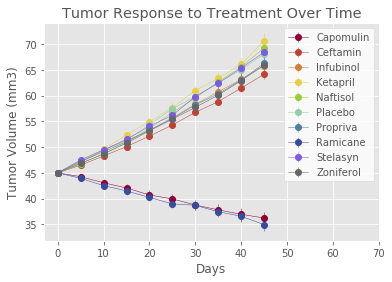

INSIGHT: Of the drugs tested, both Capomulin and Ramincane are the only treatments that, on average, decreased the mass of the tumor


In [22]:
#Tumor Response Scatter Plot
color_palette_list = ['#8C0036','#BE4236', '#D0803B', '#E6CF4B', '#99CC36','#94CCAE', '#4D819D',   
                      '#394B9C','#7B5CE0','#666666']
#Create tumor x axis
total_time = tumor_mean_pivot.index[-1]
x_axis = np.arange(0, total_time + 5, 5)

#Create tumor y axis and plot tumor data
drugs = tumor_mean_pivot.columns

fig, ax = plt.subplots()

for drug in drugs:
    error = tumor_se_pivot[drug]
    mean = tumor_mean_pivot[drug]
    tumor_response = plt.errorbar(x_axis, mean, error, marker="o", ls='-', lw=.5, label = drug)

#Format tumor scatter plot
plt.xlim(-3, total_time +25)
plt.title("Tumor Response to Treatment Over Time")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='best', facecolor="white")
plt.rcParams['text.color'] = '#555555'
plt.rcParams['axes.prop_cycle'] = cycler(color=color_palette_list)

#Save and display tumor scatter plot
plt.savefig(os.path.join("Images","tumortreatment.png"))
plt.show()
print("INSIGHT: Of the drugs tested, both Capomulin and Ramincane are the only treatments that, on average, decreased the mass of the tumor")

## Metastatic Response to Treatment

In [ ]:
#Metastatic Sites Mean
# Create the metastatic sites mean dataframe
met_data = study_data.groupby(["Drug", "Timepoint"]) ["Metastatic Sites"]
met_mean = met_data.mean()
met_mean = met_mean.reset_index()

#Pivot metastatic sites  mean dataframe
met_mean_pivot = met_mean.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

#Preview metastatic sites standard error dataframe
met_mean_pivot


In [ ]:
#Metastatic Sites Standard Error
#Create the metastatic sites standard error dataframe
met_se = met_data.sem()
met_se = met_se.reset_index()

#Pivot metastatic sites standard error dataframe
met_se_pivot = met_se.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

#Preview standard error dataframe
met_se_pivot

In [ ]:
#Metastatic Sites Scatter Plot
#Create metastatic sites x axis
total_time = met_mean_pivot.index[-1]
x_axis = np.arange(0, total_time + 5, 5)

#Create metastatic sites y axis and plot metastatic sites data
drugs = met_mean_pivot.columns

fig, ax = plt.subplots()

for drug in drugs:
    error = met_se_pivot[drug]
    mean = met_mean_pivot[drug]
    met_response = plt.errorbar(x_axis, mean, error, marker="o", ls='-', lw=.5, label = drug)

#Format metastatic sites scatter plot
plt.xlim(-3, total_time +25)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Days")
plt.ylabel("Metastatic Sites")
plt.legend(loc='best')

#Save and display metastatic sites scatter plot
plt.savefig(os.path.join("Images","metastaticspread.png"))
plt.show()
print("INSIGHT: On average, Capomulin and Ramincane show the slowest Metastatic Spread throughout the treatment")

## Survival Rates

In [ ]:
#Mouse Count
# Create the mouse count dataframe
mouse_data = study_data.groupby(["Drug", "Timepoint"]) ["Mouse ID"].count()
mouse_count = mouse_data.reset_index()

#Pivot mouse count dataframe
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

#Preview the mouse count dataframe
mouse_count_pivot


In [ ]:
#Mouse Count Plot
#Create mouse count x axis
total_time = mouse_count_pivot.index[-1]
x_axis = np.arange(0, total_time + 5, 5)

#Create metastatic sites y axis and plot metastatic sites data
drugs = mouse_count_pivot.columns

fig, ax = plt.subplots()

for drug in drugs:
    count = mouse_count_pivot[drug]
    met_response = plt.errorbar(x_axis, count, marker="o", ls='-', lw=.5, label = drug)

#Format metastatic sites scatter plot
plt.xlim(-3, total_time +25)
plt.title("Mouse Survival Rate")
plt.xlabel("Days")
plt.ylabel("Mouse Count")
plt.legend(loc='best')

#Save and display metastatic sites scatter plot
plt.savefig(os.path.join("Images","mousesurvival.png"))
plt.show()
print("INSIGHT: Of the mice being tested, those being treated with Capomulin or Ramicane were more likely to survive")

## Summary Bar Graph

In [ ]:
#Percent Changes
#Calculate the percent decrease for each drug
drugs = tumor_mean_pivot.columns
percent_change = []
change_type = []

for drug in drugs:
    start = tumor_mean_pivot[drug].iloc[0]
    end = tumor_mean_pivot[drug].iloc[-1]
    change = ((end - start)/start) * 100
    percent_change.append(change)

#Create and view dataframe of the changes for reference
percent_change_df = pd.DataFrame({"Drug":drugs, "Percent_Change":percent_change})
percent_change_df

In [ ]:
def pos_neg_color(df,color1,color2):
    return np.where(df.Percent_Change>0,color1,color2).T

#Create axes
total_drugs = percent_change_df["Drug"].count()
percent_change
x_axis = np.arange(0, total_drugs, 1)

#Create and format chart
plt.bar(x_axis, percent_change, align="center", tick_label = percent_change, color=pos_neg_color(percent_change_df,'r','g'))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.title("Percent of Tumor Change After Treatment")
plt.xlabel("Drugs")
plt.ylabel("Percent Change")


#Save and display summary bar chart
plt.savefig(os.path.join("Images","percentchange.png"))
plt.show()
print("INSIGHT: Treatments using Capomulin or Ramicane, on average, resulted in a significant decrease in the tumor volume. All other drug treatments, as well as the placebo showed high increases in tumor volume.")

In [23]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [ ]:
plt.rcParams.keys()